## **EXPLORATORY AND PREDICTIVE ANALYSIS OF THE CRYPTOCURRENCY MARKET** ##

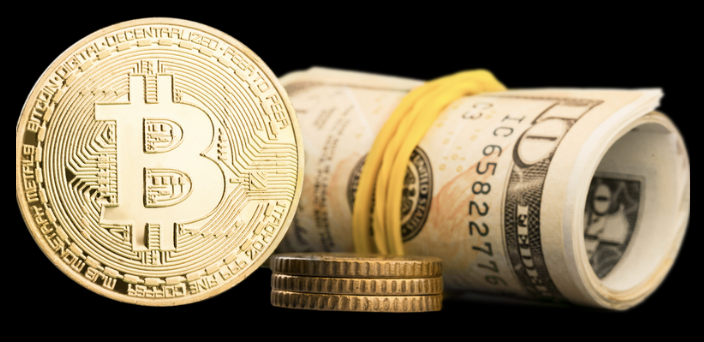



The cryptocurrency market, with its impressive underlying technology and enormous price fluctuations has gained the interest of many in the recent years. As of August 2022, the total market capitalization of cryptocurrencies stood at $1.1 trillion, which is about 2.5% of the U.S. equity market capitalization. Recent unfortunate events like the Terra controversey and the FTX collapse have plagued the trust in digital currencies, however, we believe that they are here to stay. In this project, we are analysing and prediciting prices for the cryptocurrencies that are dominating the market in terms of market capitalization. Our goal is to help individuals further understand trends and seasonalities in price fluctuations of cryptocurrencies, as well as predict future prices using the most important factors that influence daily returns.




**Data:**
We are using historical data as recorded on November 28th 2022.

**Link to datasets:**
https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-coingecko

# The cryptocurrencies that we are analysing in this project are: #
1. Bitcoin (BTC)    
2. Ethereum (ETH)
3. Tether (USDT)
4. Binance Coin (BNB)
5. Ripple (XRP)
6. Dogecoin (DOGE)
7. Cardano (ADA)
8. Polygon (MATIC)
9. Polkadot (DOT)
10. Shiba Inu (SHIB)

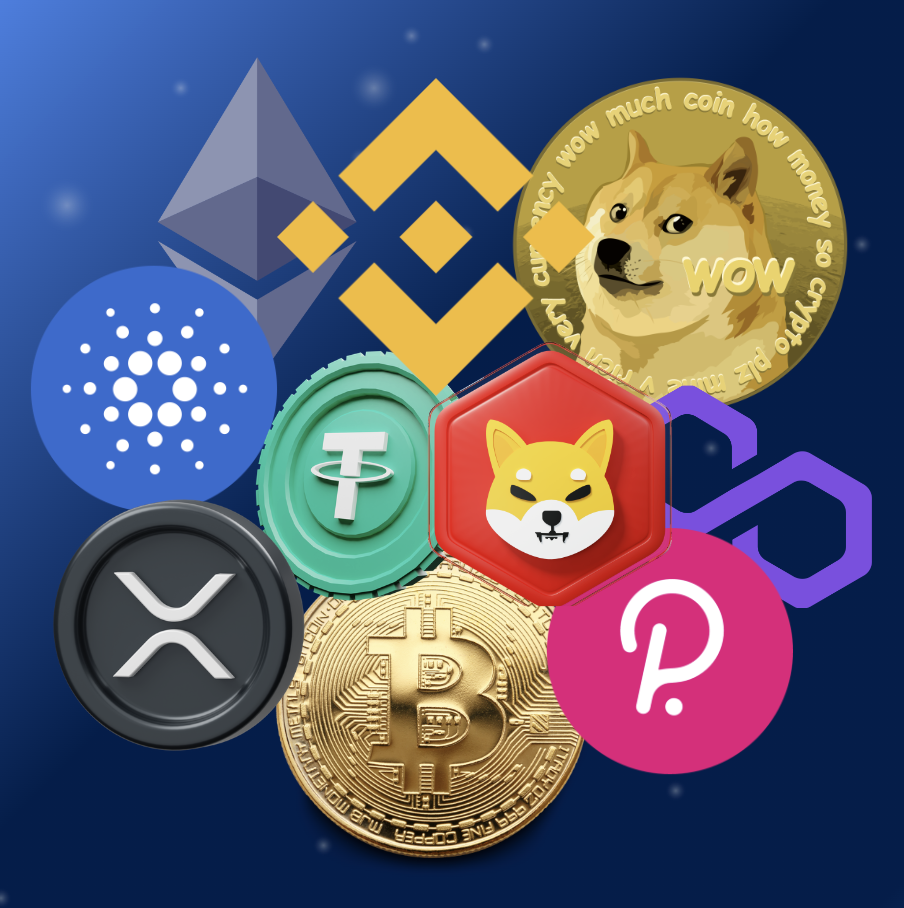


 # Part A: Exploratory Analysis #

In [2]:
# Import necessary libraries
%pylab inline
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read the data sets for the 10 cryptos
bitcoin=pd.read_csv("bitcoin.csv",parse_dates=['date'])
ethereum=pd.read_csv("ethereum.csv",parse_dates=['date'])
tether=pd.read_csv("tether.csv",parse_dates=['date'])
binancecoin=pd.read_csv("binancecoin.csv",parse_dates=['date'])
ripple=pd.read_csv("ripple.csv",parse_dates=['date'])
dogecoin=pd.read_csv("dogecoin.csv",parse_dates=['date'])
cardano=pd.read_csv("cardano.csv",parse_dates=['date'])
matic=pd.read_csv("matic-network.csv",parse_dates=['date'])
polkadot=pd.read_csv("polkadot.csv",parse_dates=['date'])
shibainu=pd.read_csv("shiba-inu.csv",parse_dates=['date'])

In [4]:
# Calculating daily percentage change in closing price for all 10 cryptos
bitcoin['Change'] = bitcoin.price.pct_change()
ethereum['Change'] = ethereum.price.pct_change()
tether['Change'] = tether.price.pct_change()
binancecoin['Change'] = binancecoin.price.pct_change()
ripple['Change'] = ripple.price.pct_change()
dogecoin['Change'] = dogecoin.price.pct_change()
cardano['Change'] = cardano.price.pct_change()
matic['Change'] = matic.price.pct_change()
polkadot['Change'] = polkadot.price.pct_change()
shibainu['Change'] = shibainu.price.pct_change()

In [5]:
bitcoin.head()

,date,price,total_volume,market_cap,coin_name,Change
0,2015-01-01,313.992,4.699936e+07,4.293958e+09,bitcoin,NaN
1,2015-01-02,314.446,3.885591e+07,4.301448e+09,bitcoin,0.001446
2,2015-01-03,286.572,1.187789e+08,3.921358e+09,bitcoin,-0.088645
3,2015-01-04,260.936,2.055001e+08,3.571640e+09,bitcoin,-0.089457
4,2015-01-05,273.220,1.550381e+08,3.740880e+09,bitcoin,0.047077


In [6]:
# Calculating age of each cryptocurrency in days and mapping it to a dictionary
currencies=['bitcoin','ethereum','tether','binancecoin','ripple','dogecoin','cardano','matic','polkadot','shibainu']
age=[len(bitcoin),len(ethereum),len(tether),len(binancecoin),len(ripple),len(dogecoin),len(cardano),len(matic),len(polkadot),len(shibainu)]
agedict=dict(zip(currencies,age))

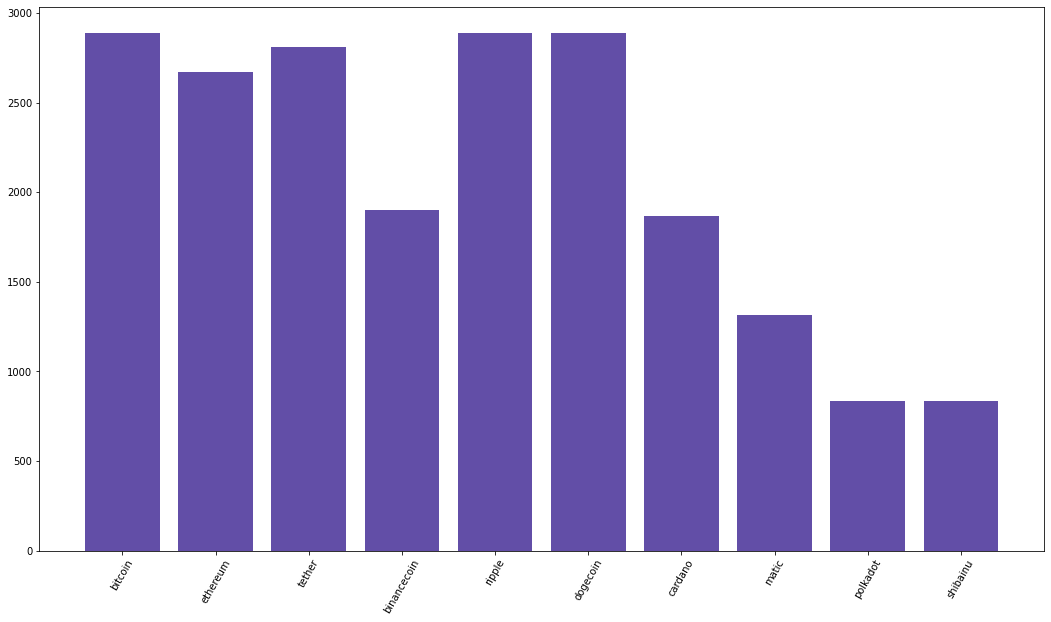

In [7]:
# Plotting the ages on a bar chart
plt.figure(figsize=(18,10))
plt.bar(list(agedict.keys()), list(agedict.values()), align='center',color='#624ea7')
plt.xticks(rotation=60)
plt.show()

From the bar chart, we observe that some crypto currencies are much younger than others. Hence we do not have the same amount of data for all of them. For the next step in our analysis, we have tried to narrow down the data to use the time frame that is common for all crypto currencies. In other words, we have considered the age of the youngest crypto currency.

To do so, first we find the youngest crypto currency, and then subset all the others to only consider the dates where the youngest crypto currency was in existence.

In order to find the common time frame we first take the minimum date in all of our data frames, after that we take the highest value among those. That is because we are looking for the most recent first day for all cryptos.

In [8]:
# Finding the earliest date of the youngest crypto currency
min_date = max(min(bitcoin['date']), 
               min(ethereum['date']), 
               min(tether['date']), 
               min(binancecoin['date']), 
               min(ripple['date']), 
               min(dogecoin['date']), 
               min(cardano['date']), 
               min(matic['date']),
               min(polkadot['date']), 
               min(shibainu['date']))

In [9]:
#Subsetting into data frames of equal size by considering only overlapping dates
bitcoin_common = bitcoin[bitcoin['date']>=min_date]
ethereum_common = ethereum[ethereum['date']>=min_date]
tether_common = tether[tether['date']>=min_date]
binancecoin_common = binancecoin[binancecoin['date']>=min_date]
ripple_common = ripple[ripple['date']>=min_date]
dogecoin_common = dogecoin[dogecoin['date']>=min_date]
cardano_common = cardano[cardano['date']>=min_date]
matic_common = matic[matic['date']>=min_date]
polkadot_common = polkadot[polkadot['date']>=min_date]
shibainu_common = shibainu[shibainu['date']>=min_date]


We can now see that all the currencies have the exact same dates in our data for exploratory analysis

In [10]:
print(tether_common.head(5))
print(tether_common.tail(5))

print(matic_common.head(5))
print(matic_common.tail(5))

           date     price  total_volume    market_cap coin_name    Change
1979 2020-08-19  0.999918  3.839772e+10  1.260305e+10    tether -0.000134
1980 2020-08-20  0.999320  3.640143e+10  1.260534e+10    tether -0.000599
1981 2020-08-21  1.001340  3.318490e+10  1.266012e+10    tether  0.002021
1982 2020-08-22  1.000172  3.974101e+10  1.276256e+10    tether -0.001167
1983 2020-08-23  0.999825  3.331321e+10  1.281223e+10    tether -0.000347
           date     price  total_volume    market_cap coin_name    Change
2806 2022-11-24  1.000502  3.815700e+10  6.554371e+10    tether  0.001458
2807 2022-11-25  1.000575  3.104670e+10  6.536760e+10    tether  0.000074
2808 2022-11-26  0.999675  2.651119e+10  6.534570e+10    tether -0.000900
2809 2022-11-27  0.999756  2.541468e+10  6.533852e+10    tether  0.000081
2810 2022-11-28  1.000923  2.333900e+10  6.543266e+10    tether  0.001167
          date     price  total_volume    market_cap      coin_name    Change
480 2020-08-19  0.026817  3.330589

Our next bit of analysis is based on this common data over the same time frame.

To begin with, first we calculate the correlation coefficients between the daily fluctuations of all currencies. This is to get an overview of whether there are any currencies that have related fluctuations.

We have used the Pearson rank correlation. The Pearson correlation coefficient, or the bivariate correlation is a measure of the linear correlation between two variables. In our case it will help us determine if there exists a linear correlation between the various metrics of the cryptocurrencies.

In [11]:
# Calculating fluctuation correlation matrix
change_dict = {'Bitcoin': bitcoin_common['Change'],
               'Ethereum': ethereum_common['Change'],
               'Tether':tether_common['Change'],
               'Binance Coin':binancecoin_common['Change'],
               'Ripple':ripple_common['Change'],
               'Dogecoin':dogecoin_common['Change'],
               'Cardano':cardano_common['Change'],
               'Matic':matic_common['Change'],
               'Polkadot':polkadot_common['Change'],
               'Shiba Inu':shibainu_common['Change'],
                  }

change_df=pd.DataFrame(change_dict)
change_correlation=change_df.corr(method='pearson')

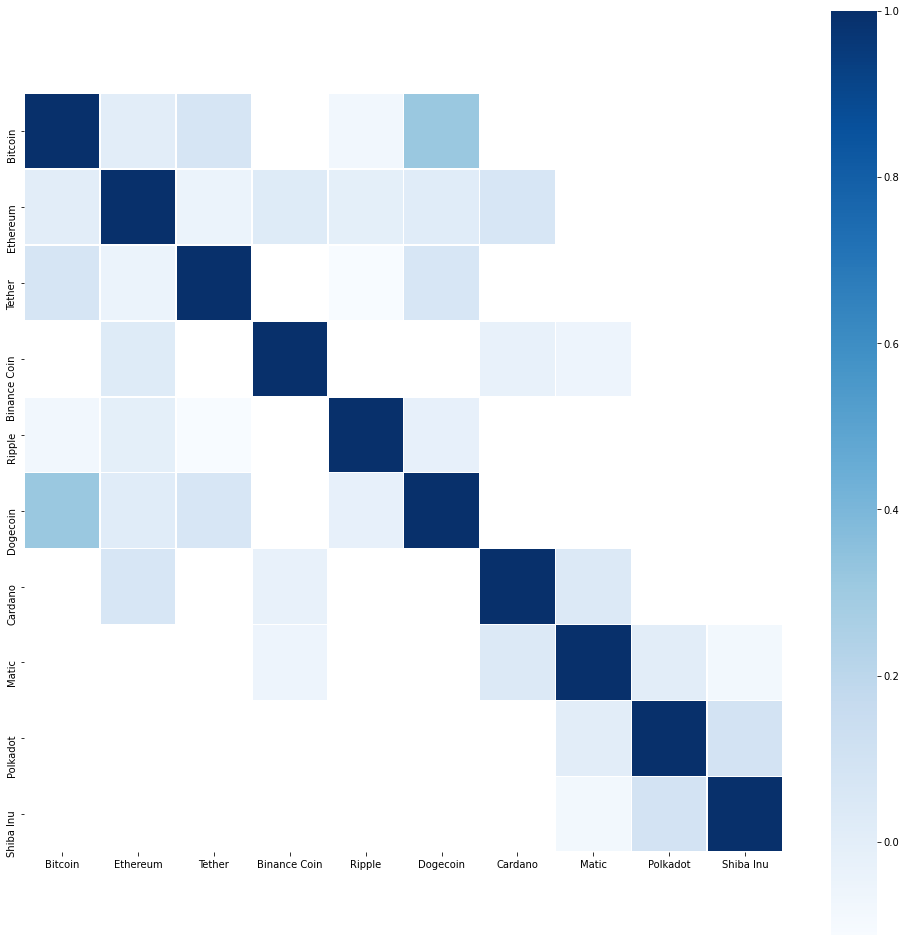

In [12]:
# Plotting the heat map
fig, ax = plt.subplots(figsize=(17,17))
sns.heatmap(change_correlation,fmt="",cmap='Blues',linewidths=0.5, square=True)

plt.show()

Here, we can observe that the correlation coefficients are all more towards the lower side. Hence, we can conclude that there is a very small correlation (if any at all) between the daily percentage changes in the closing prices of the crypto currencies.

However, there are some correlations that stand out. For example, the percentage change in **Dogecoin** is quite highly correlated with the percentage change in **Bitcoin**. This poses an interesting theory that changes in some currencies might be more related with certain currencies than with others.

In [13]:
# Calculating average daily change grouped by month
btcchange=bitcoin_common.groupby(bitcoin_common['date'].dt.strftime('%B'))['Change'].mean()
ethchange=ethereum_common.groupby(ethereum_common['date'].dt.strftime('%B'))['Change'].mean()
tetherchange=tether_common.groupby(tether_common['date'].dt.strftime('%B'))['Change'].mean()
bnbchange=binancecoin_common.groupby(binancecoin_common['date'].dt.strftime('%B'))['Change'].mean()
xrpchange=ripple_common.groupby(ripple_common['date'].dt.strftime('%B'))['Change'].mean()
dogechange=dogecoin_common.groupby(dogecoin_common['date'].dt.strftime('%B'))['Change'].mean()
cardanochange=cardano_common.groupby(cardano_common['date'].dt.strftime('%B'))['Change'].mean()
maticchange=matic_common.groupby(matic_common['date'].dt.strftime('%B'))['Change'].mean()
polkadotchange=polkadot_common.groupby(polkadot_common['date'].dt.strftime('%B'))['Change'].mean()
shibchange=shibainu_common.groupby(shibainu_common['date'].dt.strftime('%B'))['Change'].mean()

In [14]:
# Preparing the data frame
newdict={'Bitcoin':btcchange,
         'Ethereum':ethchange,
         'Tether':tetherchange,
         'Binance Coin':bnbchange,
         'Ripple':xrpchange,
         'Dogecoin':dogechange,
         'Cardano':cardanochange,
         'Polygon':maticchange,
         'Polkadot':polkadotchange,
         'Shiba Inu':shibchange}
avg_change=pd.DataFrame(data=newdict)

In [15]:
# Reordering the rows to maintain chronology
avg_change=avg_change.reindex(["January","February","March","April","May","June","July","August","September","October","November","December"])

In [16]:
avg_change

,Bitcoin,Ethereum,Tether,Binance Coin,Ripple,Dogecoin,Cardano,Polygon,Polkadot,Shiba Inu
date,,,,,,,,,,
January,0.000210,0.006130,-0.000067,-0.001650,0.009167,0.065267,0.009391,0.009144,0.011181,0.568063
February,0.006508,0.002700,-0.000028,0.036264,0.006716,0.014148,0.023034,0.031833,0.014154,0.078380
March,0.007996,0.008415,0.000050,0.009766,0.007764,0.004396,0.005072,0.015644,0.005072,0.063252
April,-0.004371,0.004435,0.000045,0.010509,0.014128,0.040316,-0.004189,0.012422,-0.003393,0.093119
May,-0.008483,-0.004801,-0.000050,-0.009225,-0.009303,-0.001698,0.001953,0.012323,-0.010155,0.085315
June,-0.006272,-0.009773,0.000052,-0.006031,-0.006279,-0.002016,-0.003974,-0.009273,-0.007764,0.002727
July,0.005586,0.010261,0.000024,0.006049,0.004266,-0.003223,0.001840,0.010969,0.003184,-0.002450
August,-0.001067,0.003018,-0.000051,0.005102,0.002493,0.002260,0.006766,0.001832,0.017159,0.015088
September,-0.001804,-0.003493,0.000071,0.001261,0.002101,-0.005152,-0.003795,-0.004581,-0.001067,0.002294


In [17]:
# Applying background gradients to study trends in the data frame
avg_change.style.background_gradient()

,Bitcoin,Ethereum,Tether,Binance Coin,Ripple,Dogecoin,Cardano,Polygon,Polkadot,Shiba Inu
date,,,,,,,,,,
January,0.000210,0.006130,-0.000067,-0.001650,0.009167,0.065267,0.009391,0.009144,0.011181,0.568063
February,0.006508,0.002700,-0.000028,0.036264,0.006716,0.014148,0.023034,0.031833,0.014154,0.078380
March,0.007996,0.008415,0.000050,0.009766,0.007764,0.004396,0.005072,0.015644,0.005072,0.063252
April,-0.004371,0.004435,0.000045,0.010509,0.014128,0.040316,-0.004189,0.012422,-0.003393,0.093119
May,-0.008483,-0.004801,-0.000050,-0.009225,-0.009303,-0.001698,0.001953,0.012323,-0.010155,0.085315
June,-0.006272,-0.009773,0.000052,-0.006031,-0.006279,-0.002016,-0.003974,-0.009273,-0.007764,0.002727
July,0.005586,0.010261,0.000024,0.006049,0.004266,-0.003223,0.001840,0.010969,0.003184,-0.002450
August,-0.001067,0.003018,-0.000051,0.005102,0.002493,0.002260,0.006766,0.001832,0.017159,0.015088
September,-0.001804,-0.003493,0.000071,0.001261,0.002101,-0.005152,-0.003795,-0.004581,-0.001067,0.002294


This is an extremely interesting observation. We can see bitcoin, ethereum, tether and ripple have the most fluctuation. Further, we can see that the highest daily change occurs in January and February compared to the rest of the months. This can be because at the end of the holiday season, once holiday parties and gifitng rituals come to an end, people have more disposable income that they consider investing in the cryptocurrency market. 

In [18]:
#We will now analyse price fluctuations of cryptocurrencies in the first 200 days of its existence

twohundred_dict = {'Bitcoin' : bitcoin.price.tail(200).reset_index()['price'], 
                   'Ethereum' : ethereum.price.tail(200).reset_index()['price'],
                   'Tether' : tether.price.tail(200).reset_index()['price'], 
                   'Binance Coin' : binancecoin.price.tail(200).reset_index()['price'], 
                   'Ripple' : ripple.price.tail(200).reset_index()['price'], 
                   'Dogecoin' : dogecoin.price.tail(200).reset_index()['price'], 
                   'Cardano' : cardano.price.tail(200).reset_index()['price'], 
                   'Polygon' : matic.price.tail(200).reset_index()['price'], 
                   'Polkadot' : polkadot.price.tail(200).reset_index()['price'], 
                   'Shiba Inu' : shibainu.price.tail(200).reset_index()['price']}

twohundred_df = pd.DataFrame(twohundred_dict).reset_index()
del twohundred_df['index']
twohundred_df.head(10)

,Bitcoin,Ethereum,Tether,Binance Coin,Ripple,Dogecoin,Cardano,Polygon,Polkadot,Shiba Inu
0,29126.115977,1966.699171,0.998053,269.772801,0.387721,0.083031,0.475378,0.601768,8.769325,0.000011
1,29310.728960,2010.214051,1.000610,291.055384,0.422161,0.088462,0.529947,0.665377,10.487976,0.000013
2,30189.333177,2064.229358,1.003105,298.359218,0.430018,0.090026,0.541135,0.687054,11.376092,0.000013
3,31319.309111,2147.047448,1.000854,311.975627,0.448154,0.093173,0.597732,0.735780,11.800641,0.000013
4,29923.606994,2025.888698,1.001371,298.165819,0.423552,0.087996,0.557292,0.676024,10.661735,0.000012
5,30502.193280,2095.178885,1.000586,306.535843,0.439154,0.090419,0.579367,0.729033,11.053819,0.000013
6,28772.200501,1915.177123,1.000228,288.249178,0.406476,0.083987,0.506995,0.626459,9.517212,0.000012
7,30382.406242,2023.848259,1.001082,307.630494,0.421630,0.087074,0.534898,0.662318,10.071635,0.000012
8,29256.813374,1963.990940,1.001254,302.908434,0.411493,0.084519,0.518369,0.636165,9.695758,0.000012
9,29491.507948,1978.147133,1.000829,312.815429,0.415275,0.084534,0.529492,0.649914,9.996885,0.000012


<AxesSubplot:ylabel='Shiba Inu'>

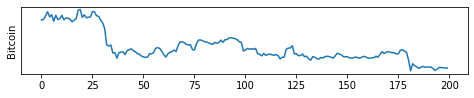

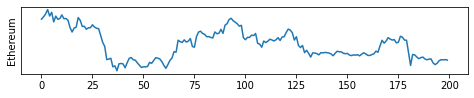

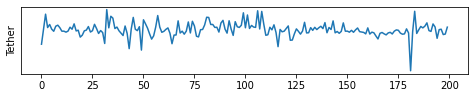

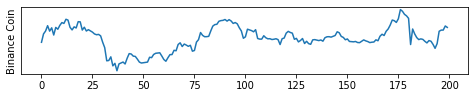

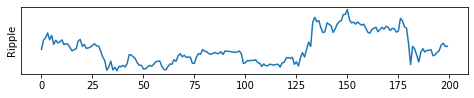

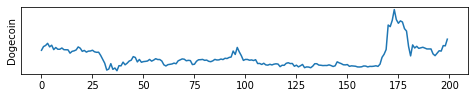

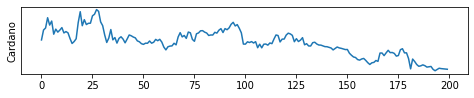

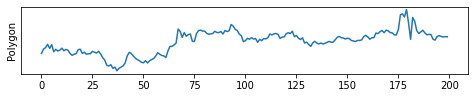

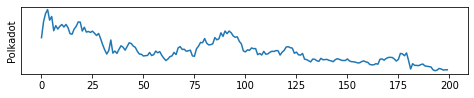

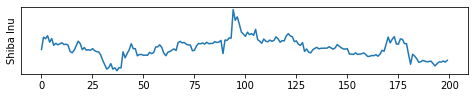

In [19]:
#We plot the movement of each cryptocurrency in the first two hundred days of its existence.

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Bitcoin')
ax1.set_yticks([])
twohundred_df['Bitcoin'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Ethereum')
ax1.set_yticks([])
twohundred_df['Ethereum'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Tether')
ax1.set_yticks([])
twohundred_df['Tether'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Binance Coin')
ax1.set_yticks([])
twohundred_df['Binance Coin'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Ripple')
ax1.set_yticks([])
twohundred_df['Ripple'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Dogecoin')
ax1.set_yticks([])
twohundred_df['Dogecoin'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Cardano')
ax1.set_yticks([])
twohundred_df['Cardano'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Polygon')
ax1.set_yticks([])
twohundred_df['Polygon'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Polkadot')
ax1.set_yticks([])
twohundred_df['Polkadot'].plot()

fig=plt.figure(figsize=(8,25))
ax1=plt.subplot(17,1,1)
ax1.set_ylabel('Shiba Inu')
ax1.set_yticks([])
twohundred_df['Shiba Inu'].plot()

**Interpretation:**

For all the coins, we can see relatively low fluctuations in the first 200 days of existence. This is because most projects are still under constant development after they launch, and it takes time for the projects to gather attention from the masses, which is when the real price fluctuations begin.

Some notable fluctuations we can see are:

Tether: Tether expereinces minimum volatile, which makes sense because it is a stablecoin whose value is pegged to the US dollar. 

Dogecoin: Dogecoin saw a steep rise in price at ~day175 of its existence. Since dogecoin does not have any real utlity, this price rise can only be attributed to pump-and-dump schemes by the public.


In [20]:
#Next, we move on to analyze the activity of the price of crypto currencies in days 201 to day 600 of cryptos that are at least 600 days old.

bitcoin = bitcoin.reset_index()
ethereum = ethereum.reset_index()
tether = tether.reset_index()
binancecoin= binancecoin.reset_index()
ripple = ripple.reset_index()
dogecoin = dogecoin.reset_index()
cardano = cardano.reset_index()
matic = matic.reset_index()
polkadot = polkadot.reset_index()
shibainu = shibainu.reset_index()




sixhundred_dict = {'Bitcoin' : bitcoin['price'][(bitcoin.index>200) & (bitcoin.index < 601)].reset_index()['price'],
                   'Ethereum' : ethereum['price'][(ethereum.index>200) & (ethereum.index < 601)].reset_index()['price'],
                   'Tether' : tether['price'][(tether.index>200) & (tether.index < 601)].reset_index()['price'],
                   'Binance Coin' : binancecoin['price'][(binancecoin.index>200) & (binancecoin.index < 601)].reset_index()['price'],
                   'Ripple' : ripple['price'][(ripple.index>200) & (ripple.index < 601)].reset_index()['price'],
                   'Dogecoin' : dogecoin['price'][(dogecoin.index>200) & (dogecoin.index < 601)].reset_index()['price'],
                   'Cardano' : cardano['price'][(cardano.index>200) & (cardano.index < 601)].reset_index()['price'], 
                   'Polygon' : matic['price'][(matic.index>200) & (matic.index < 601)].reset_index()['price'],
                   'Polkadot' : polkadot['price'][(polkadot.index>200) & (polkadot.index < 601)].reset_index()['price'],
                   'Shiba Inu' : shibainu['price'][(shibainu.index>200) & (shibainu.index < 601)].reset_index()['price']}

sixhundred_df = pd.DataFrame(sixhundred_dict).reset_index()
del sixhundred_df['index']
sixhundred_df.head(5)



,Bitcoin,Ethereum,Tether,Binance Coin,Ripple,Dogecoin,Cardano,Polygon,Polkadot,Shiba Inu
0,276.175600,5.936257,1.0,12.304352,0.007699,0.000183,0.349031,0.014932,35.244069,2.219189e-08
1,275.613500,5.897352,1.0,12.400382,0.007560,0.000177,0.334283,0.014426,34.971507,2.560992e-08
2,288.444717,6.357092,1.0,12.060487,0.007476,0.000187,0.321818,0.013826,38.395666,1.939925e-08
3,288.388159,6.440651,1.0,11.887883,0.007673,0.000188,0.315994,0.014382,37.779840,1.774137e-08
4,291.703765,6.312028,1.0,12.022866,0.007876,0.000187,0.295296,0.014306,36.878312,1.785508e-08


<ipython-input-64-7ed756b4cc26>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_xticklabels(labels)


[]

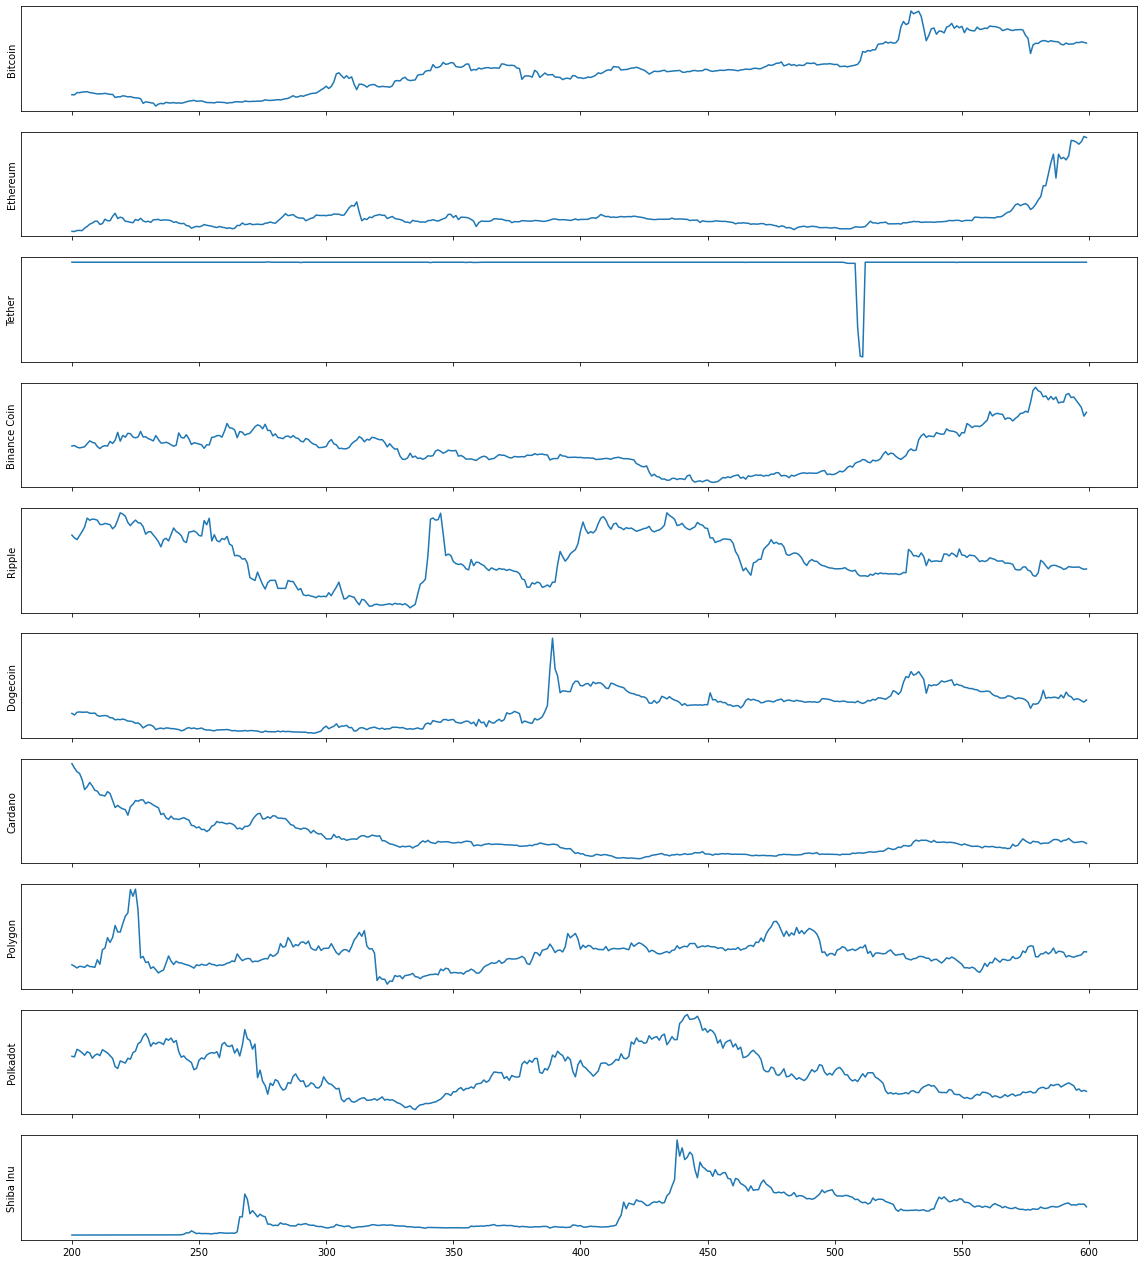

In [64]:
fig=plt.figure(figsize=(20,25))
ax1=plt.subplot(11,1,1)
ax1.set_ylabel('Bitcoin')
ax1.set_yticks([])
sixhundred_df['Bitcoin'].plot()
ax2=plt.subplot(11,1,2,sharex=ax1)
ax2.set_ylabel('Ethereum')
ax2.set_yticks([])
sixhundred_df['Ethereum'].plot()
ax3=plt.subplot(11,1,3,sharex=ax1)
ax3.set_ylabel('Tether')
ax3.set_yticks([])
sixhundred_df['Tether'].plot()
ax4=plt.subplot(11,1,4,sharex=ax1)
ax4.set_ylabel('Binance Coin')
ax4.set_yticks([])
sixhundred_df['Binance Coin'].plot()
ax5=plt.subplot(11,1,5,sharex=ax1)
ax5.set_ylabel('Ripple')
ax5.set_yticks([])
sixhundred_df['Ripple'].plot()
ax6=plt.subplot(11,1,6,sharex=ax1)
ax6.set_ylabel('Dogecoin')
ax6.set_yticks([])
sixhundred_df['Dogecoin'].plot()
ax7=plt.subplot(11,1,7,sharex=ax1)
ax7.set_ylabel('Cardano')
ax7.set_yticks([])
sixhundred_df['Cardano'].plot()
ax8=plt.subplot(11,1,8,sharex=ax1)
ax8.set_ylabel('Polygon')
ax8.set_yticks([])
sixhundred_df['Polygon'].plot()
ax9=plt.subplot(11,1,9,sharex=ax1)
ax9.set_ylabel('Polkadot')
ax9.set_yticks([])
sixhundred_df['Polkadot'].plot()
ax10=plt.subplot(11,1,10,sharex=ax1)
ax10.set_ylabel('Shiba Inu')
ax10.set_yticks([])
sixhundred_df['Shiba Inu'].plot()

labels=[0, 200, 250, 300, 350 ,400 ,450 ,500 ,550,600]
ax7.set_xticklabels(labels)

As expected, price volatility only increases as the coins get older. 

Bitcoin has seen a strong and steady upward trend, owing to increasing public confidence in blockchain technology.

Ethereum saw a slower rise initially and then a steep rise towards day 550 of its existence. 

Tether saw its price reamin stable as expected. However, it dropped in price to $0.57 in March 2015, which has been its lifetime low till date. The price swings occur when demand for the token changes. When the crypto market is surging, demand for stablecoins like tether is typically low. Tether’s history of lawsuits has also played a part in reducing demand for the crypto asset. 

Ripple also sees a steep rise around 1 year after it was created. This can be bevause, in 2013, Ripple was working heavily on developing its open payments network that would transfer its cryptocurrency, the XRP. It was also quickly listed on the few crypto marketplaces that existed back then, which further boosted its value.

Dogecoin and Shiba Inu both see sudden spikes and drops. That is the very nature of meme coins- they are unpredictable and demand can only be forecasted based on public sentiment. 

The other coins see rises and dips in prices as is customary for the cryptocurrency market. Macroeconomic factors affect these prices as well.

In [22]:
#Next, we transformed the data into time series data in order to analyze the movement of each cryptocurrency over its entire lifetime.
# Setting the Date column as the index for the data
bitcoin=bitcoin.set_index('date')
ethereum=ethereum.set_index('date')
tether=tether.set_index('date')
binancecoin=binancecoin.set_index('date')
ripple=ripple.set_index('date')
dogecoin=dogecoin.set_index('date')
cardano=cardano.set_index('date')
matic = matic.set_index('date')
polkadot=polkadot.set_index('date')
shibainu=shibainu.set_index('date')

In [23]:
# Sorting the data from earliest to most recent
bitcoin.sort_index(axis=0,inplace=True)
ethereum.sort_index(axis=0,inplace=True)
tether.sort_index(axis=0,inplace=True)
binancecoin.sort_index(axis=0,inplace=True)
ripple.sort_index(axis=0,inplace=True)
dogecoin.sort_index(axis=0,inplace=True)
cardano.sort_index(axis=0,inplace=True)
matic.sort_index(axis=0,inplace=True)
polkadot.sort_index(axis=0,inplace=True)
shibainu.sort_index(axis=0,inplace=True)

<AxesSubplot:title={'center':'Bitcoin'}, xlabel='date'>

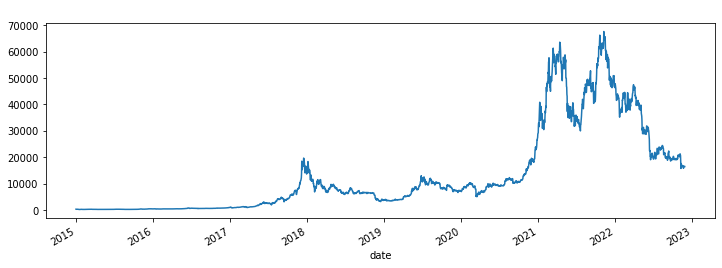

In [24]:
#Lifetime analysis for bitcoin
fig=plt.figure(figsize=(12,4))
plt.title('Bitcoin', color="white")
bitcoin['price'].plot()

Based on the graph for the lifetime analysis, Bitcoin has seen drastic increases since it's start in 2015. In 2018, Bitcoin saw an almost $20,000 increase with a slight decrease in the following two years. But in 2021, Bitcoin saw another drastic increase to above $60,000. Though during 2022 the price saw another substantial decrease to around $20,000, the current price seems to be stabilizing around $20,000 making it the lowest price point since 2017/2018 but no signs of dropping to a lower point.

<AxesSubplot:title={'center':'Ethereum'}, xlabel='date'>

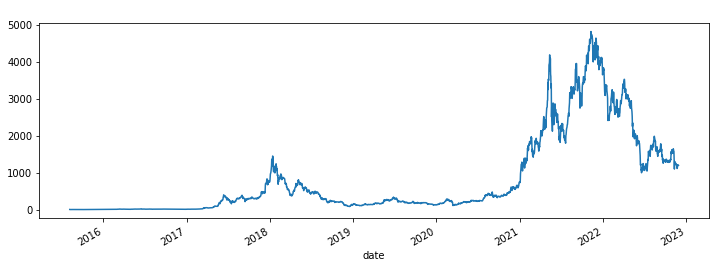

In [25]:
#Lifetime analysis for ethereum
fig=plt.figure(figsize=(12,4))
plt.title('Ethereum', color="white")
ethereum['price'].plot()

Ethereum has also seen an increase in both 2017 and 2021, the former being a high of around $1500 with the 2021 price point hitting a high of almost $5000. The coin also saw a steap drop, hitting a low of about $1000 in the later half of 2021 and stabilizing at around $1500. 

<AxesSubplot:title={'center':'Tether'}, xlabel='date'>

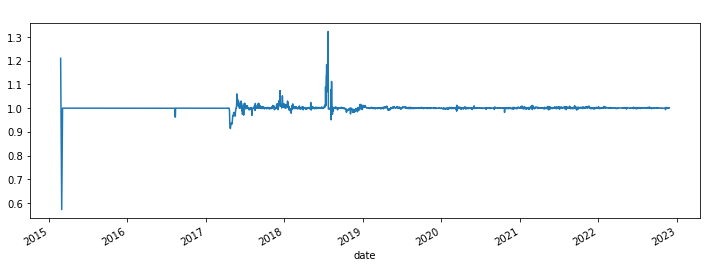

In [26]:
#Lifetime analysis for tether
fig=plt.figure(figsize=(12,4))
plt.title('Tether', color="white")
tether['price'].plot()

Tether, being a stable coin, has stayed fairly true to the price of the US dollar. In 2015, they saw a decrease to about $.60 due to uncertainty around the coin, but very quickly rebounded to match the dollar, even seeing some fluctuation and a slight increase above the dollar in the middle of late 2018. Despite the quick changes, tether stays true to it's connection to the dollar.

<AxesSubplot:title={'center':'Binance Coin'}, xlabel='date'>

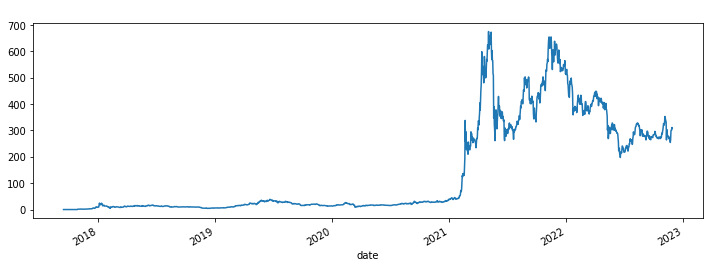

In [27]:
#Lifetime analysis for binance coin 
fig=plt.figure(figsize=(12,4))
plt.title('Binance Coin', color="white")
binancecoin['price'].plot()

Binance Coin has seen a steady increase overall from it's start in late 2017. Despite dropping from it's peak of almost $700 in 2022, it has been keeping a steady price of around $300 which is still a significant increase from it's earlier of under $100 in the start of 2017 before the price spike.

<AxesSubplot:title={'center':'Ripple'}, xlabel='date'>

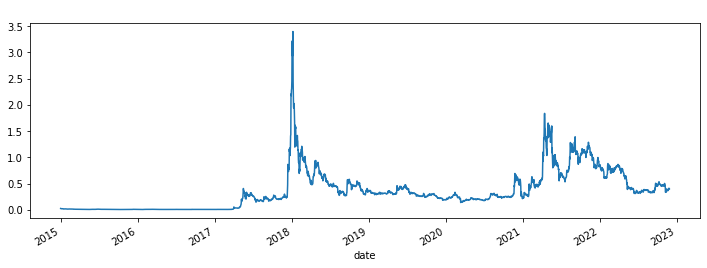

In [28]:
#Lifetime analysis for ripple
fig=plt.figure(figsize=(12,4))
plt.title('Ripple', color="white")
ripple['price'].plot()

In Ripple's graph, you can see that the coin has kept a pretty low value, seeing two spikes in 2018 and 2021. In 2018, Ripple saw a significant increase to approximately $3.50 but quickly fell back to around $.50 in the same year. Again in 2021 Ripple saw an increase to about $2 but again falling and stabilizing at about $.50 going into 2023.

<AxesSubplot:title={'center':'Dogecoin'}, xlabel='date'>

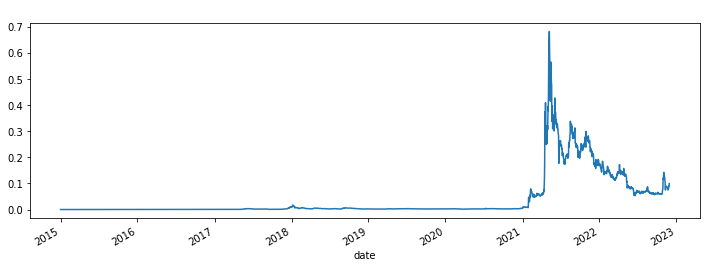

In [29]:
#Lifetime analysis for dogecoin
fig=plt.figure(figsize=(12,4))
plt.title('Dogecoin', color="white")
dogecoin['price'].plot()


Even though dogecoin has been around since 2015, it was not lucky enough to see a spike in 2017 but did see a huge spike in early 2021. Dogecoin had a steady price of under $.01 until it's drastic increase to $.07 due to the internet and celebrities taking interest in the "meme coin" allowing for a huge rally. Though it has seen a huge frop since it's spike, it currently sits at around $.01 showing a decent increase from it's initial value comparatively.

<AxesSubplot:title={'center':'Cardano'}, xlabel='date'>

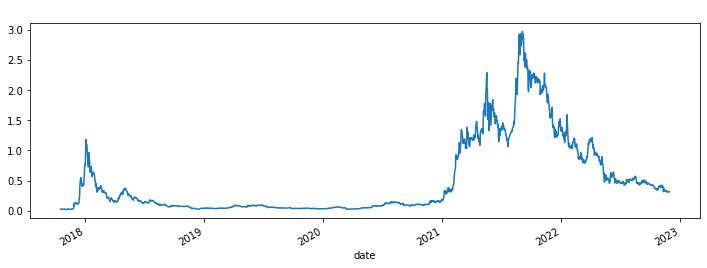

In [30]:
#Lifetime analysis for cardano
fig=plt.figure(figsize=(12,4))
plt.title('Cardano', color="white")
cardano['price'].plot()

Cardano had an initial spike early on, having been released in late 2017 at less than $0.01 and seeing a massive increase to almost $1.50 for a short time in 2018. After the spike, it quickly dropped back to around $0.01 until 2021 where it saw a steep increase and some volatility, hitting almost $3 before dropping again in late 2022. It is currently on a decline and seems to be on a downward trend at least until the start of 2023.

<AxesSubplot:title={'center':'Polygon'}, xlabel='date'>

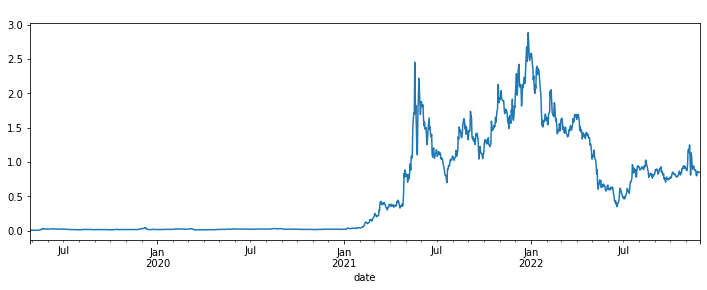

In [31]:
#Lifetime analysis for matic
fig=plt.figure(figsize=(12,4))
plt.title('Polygon', color="white")
matic['price'].plot()


Though Polygon seems to have a short life, it started as MATIC coin in 2017. Having rebranded in 2021, Polygon started at virtually $0.00. It then had a significant boost in the start of January 2021, rising to about $2.50 and them again to $3.00. In 2022 it saw a fall but is currently averaging a price around $1.00.

<AxesSubplot:title={'center':'Polkadot'}, xlabel='date'>

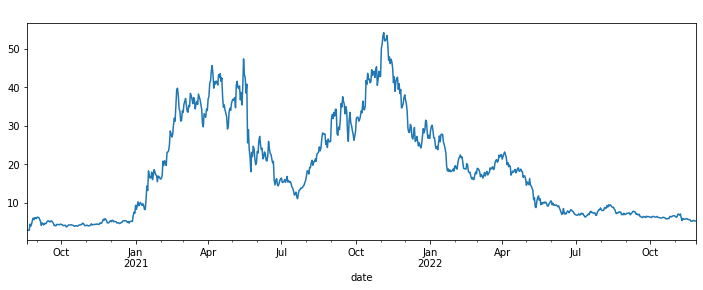

In [32]:

#Lifetime analysis for polkadot
fig=plt.figure(figsize=(12,4))
plt.title('Polkadot', color="white")
polkadot['price'].plot()

Polkadot is a fairly new coin that has seen a lot of volatility during its lifespan. Having started in 2020, Polkadot shot to $5.00 quickly. It then shot up to approximately $40 in early 2021 and moved between $30 and $50 during the next few months before dropping to around $10 in mid 2021. It then rose again to over $50 in late 2021 before falling again for the year of 2022. It currently continues to decrease hitting a low of approximately $5.00.

<AxesSubplot:title={'center':'Shiba Inu'}, xlabel='date'>

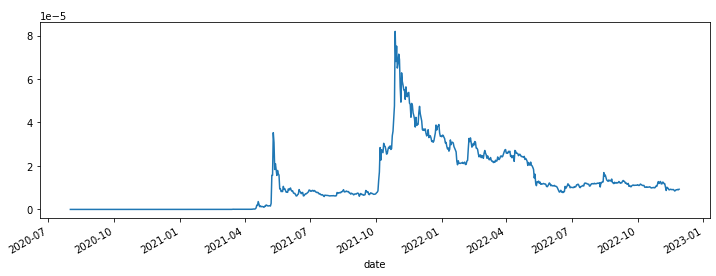

In [33]:
#Lifetime analysis for shiba inu
fig=plt.figure(figsize=(12,4))
plt.title('Shiba Inu', color="white")
shibainu['price'].plot()

This is the only 'meme coin' we have included in our analysis. Shiba coin started in August 2020and didn't see any real movement until mid 2021, with a significant increase to around $4.00. After the spike it fell but was able to mantain the price of approximately $1.00 before spiking again in 2022 to over $8.00. It is currently on the path to stabilizing back at $1.00 for 2023. A lot of these fluctuations can be attributed to Reddit frenzies, where individuals on the website create a frenzy around the coin to push up the price for short term gains.

In conclusion, For most of the cryptocurrencies we have viewed it is clear that there is a trend. Of course the stable coin sees little fluctuation because it is tied to the US dollar, but the other currencies have seen the benefits and the drawbacks of the unknown future of crypto. A lot of the crypto saw the slight increase in late 2017, though some did not like dogecoin, due to not being seen as a serious coin. Almost every cryptocurrency saw the dramatic spike in 2021 thanks to so many companies acknowledging and accepting different types of crypto. Because of the acknowledgement of crypto, it became the target of many regulations and policies. Adding inflation with these policies has started a rapid decline in almost every cryptocurrency, that being said, it is clear that it is till useful, having a lot of the currencies not yet hit their lowest point, giving hope for another increase in the near future.

 # Part B: Predictive Analysis #

#### **********LOGISTIC REGRESSION TO PREDICT IF THE PRICE OF DOGECOIN IS GOING TO RISE OR FALL********** ####

We import our data. We intend on computing the daily percentage changes in the price of bitcoin, for which we create a small code to store the precentage change value.

We then convert the date format to float and remove any NA values in the dataset. 

In [34]:
# import the dataset
dogecoin = pd.read_csv('dogecoin.csv')

#Compute the percent change on the daily bitcoin price
dogecoin['Change in price'] = dogecoin.price.pct_change()

def category_create(pctchange):
    """Creates a new variable that is 1 if the price went up and 0 if the price went down"""
    if pctchange > 0 :
        return 1
    elif pctchange <= 0 :
        return 0
    else :
        return None

dogecoin['target'] = dogecoin['Change in price'].apply(lambda pctchange: category_create(pctchange))

dogecoin['date'] = dogecoin['date'].apply(lambda x: float(x.split()[0].replace('-', '')))
dogecoin.dropna(inplace=True)

dogecoin.head()

,date,price,total_volume,market_cap,coin_name,Change in price,target
1,20150102.0,0.000184,363741.739089,1.784733e+07,dogecoin,0.002250,1.0
2,20150103.0,0.000168,270052.236025,1.632320e+07,dogecoin,-0.085599,0.0
3,20150104.0,0.000158,353697.860482,1.538501e+07,dogecoin,-0.057685,0.0
4,20150105.0,0.000160,554935.735782,1.560247e+07,dogecoin,0.013912,1.0
5,20150106.0,0.000169,287943.320277,1.644846e+07,dogecoin,0.053992,1.0


First we import all the neccessary packages. Then we create a training data set and a test data set by splitting the data. 40% of random data is considered as test data.

We apply LogisticRegression model on the train data and predict the price by fitting the model to the test data.

In [35]:
#Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# prepare X and y arrays
y = dogecoin['target']
X = dogecoin.drop(['target','coin_name'], axis=1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the logistic regression classifier using liblinear solver: logreg
logreg = LogisticRegression(solver='liblinear')

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Logistic regression using statsmodels.formula
import statsmodels.formula.api as smf
model = smf.logit(
formula = 'target ~ date + total_volume + market_cap + price', data = dogecoin)
results = model.fit()

print(results.summary())

[[580  12]
 [546  17]]
              precision    recall  f1-score   support

         0.0       0.52      0.98      0.68       592
         1.0       0.59      0.03      0.06       563

    accuracy                           0.52      1155
   macro avg       0.55      0.50      0.37      1155
weighted avg       0.55      0.52      0.37      1155

Optimization terminated successfully.
         Current function value: 0.691288
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 2886
Model:                          Logit   Df Residuals:                     2881
Method:                           MLE   Df Model:                            4
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                0.001519
Time:                        16:56:47   Log-Likelihood:                -1995.1
converged:                       True   LL-Null:                       -19

We then calculated the confusion matrix and the regression summary to see the performance of the model. We focus on Log-Likelihood, which should be always negative and as high as possible.

#### **ARIMA model for time series forecasting and predicting the price of Polkadot** ####

In [36]:

# Importing required libraries
from pandas.plotting import autocorrelation_plot
%pylab inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [37]:
# Fitting the ARIMA model
model = ARIMA(polkadot[['price']], order=(10,1,0))
model_fit = model.fit(disp=0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarni

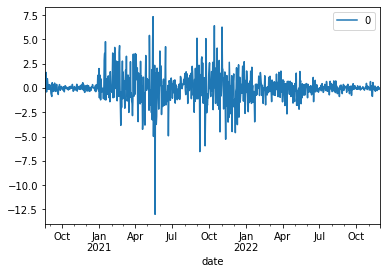

In [38]:
# Calculating and plotting the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot();

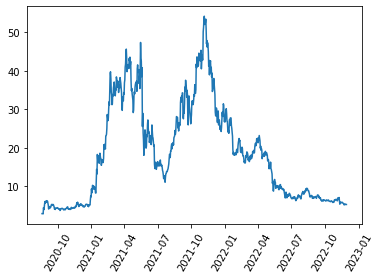

In [39]:
# Plotting the opening price of polkadot
pyplot.plot(polkadot.price)
plt.xticks(rotation=60);

We can clearly see from the two plots above that our resudial values get larger as the movement in the price grows. As the price becomes more volatile and higher in scale, the predictions that our model makes contain larger errors (which is to be expected).

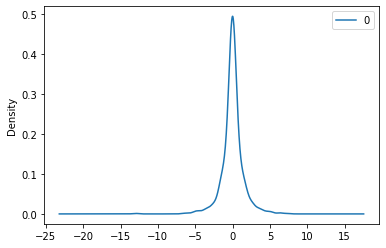

In [40]:
# Plotting the residuals in the predictions of the price of polkadot
residuals.plot(kind='kde');

The graph above shows the distribution of where our resudial values are situated on the scale. We can clearly see that most if not all of them are somewhere between -5 and 5.

In [41]:
# Statistical description of residuals
residuals.describe()

,0
count,831.000000
mean,-0.000107
std,1.458679
min,-13.010547
25%,-0.446942
50%,-0.012726
75%,0.446718
max,7.351845


In [66]:
#Creating a loop that runs the ARIMA model on our data and predicts all the points, after which there is a plot of the expected values versus the predicted values.


series = polkadot.price
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


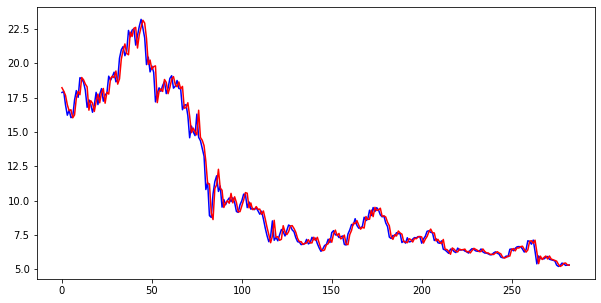

In [43]:
# Plotting the actual vs. predicted price
plt.figure(figsize=(10,5))
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red');

As we can see from the plot above, the ARIMA model could clearly conform to the pattern of the 'Polkadot' time series. We have some residual values of course, and the predictions are not perfect, but the model definitely captured the trends correctly.

In [44]:
# Running the same ARIMA model on cardano price to confirm its validity
series = cardano.price
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print(error)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


0.005891188874118633


The low RMSE (root-mean-squared-error) value of 0.00589 is a strong indicator that our model is perfoming well on Cardano. We will now visualise the actual vs predicted price to confirm this.

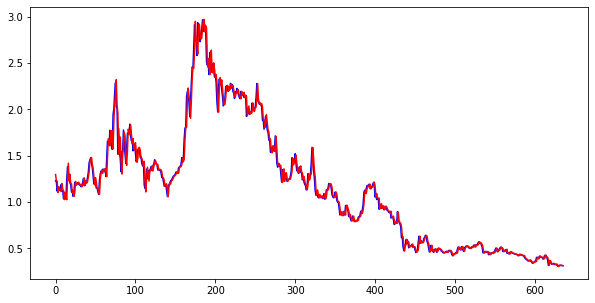

In [45]:
# Plotting the actual vs. predicted price
plt.figure(figsize=(10,5))
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red');

As we can see above, the ARIMA model performs quite well on Cardano as well. The prediction is never perfect but the predicted plot matches the expected values plot in terms of trends and movement of data.

### ******RANDOM FOREST REGRESSION TO PREDICT THE PRICE OF BITCOIN****** ###

In [46]:
#Using random forest to predict bitcoin prices
bitcoin.shape
bitcoin.dropna(inplace=True)

#Using daily volume and daily market capitalization as the variables of interest
interest = ["total_volume", "market_cap"]
df = bitcoin[interest]
df.describe()



,total_volume,market_cap
count,2.886000e+03,2.886000e+03
mean,1.692506e+10,2.459042e+11
std,2.330161e+10,3.104248e+11
min,1.823845e+07,2.362640e+09
25%,9.951368e+08,1.324557e+10
50%,5.838842e+09,1.292225e+11
75%,2.761408e+10,3.270669e+11
max,4.293082e+11,1.278798e+12


In [47]:
#Applying random forest

X = bitcoin[interest]
y = bitcoin['price']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [48]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(random_state=5)

In [49]:
randomforest.fit(train_X, train_y)

RandomForestRegressor(random_state=5)

In [50]:
rf_pred = randomforest.predict(val_X)

#check predicted values for last 5 data points of the validation data
print(randomforest.predict(X.tail()))
bitcoin['price'].tail()

[16603.944645   16615.94066507 16583.6166435  16460.32544305
 16458.84572827]


date
2022-11-24    16608.009985
2022-11-25    16596.035758
2022-11-26    16524.449008
2022-11-27    16456.156062
2022-11-28    16459.149544
Name: price, dtype: float64

In [51]:
#checking accuracy of predicted values using Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
rf_val_mae = mean_absolute_error(val_y,rf_pred)
rf_val_mae

86.53550025780888

The above value indictes that on average, our predicted values are **$86.53** off from the actual values. This is very impressive because bitcoin prices are 5-digit figures, and an error as small as ours indicates high prediction accuracy.

### *****We will now proceed to our final model: K nearest neighbours to predict the price of matic***** ###

First we import all the neccessary packages and the data. Then, we view the first 5 rows of the matic data, and convert the date column from string datatype to datetime.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

matic = pd.read_csv('matic-network.csv').dropna()
print(matic.head())

matic.date = pd.to_datetime(matic.date, yearfirst=True)

         date     price  total_volume    market_cap      coin_name
0  2019-04-27  0.005470  4.315835e+07  1.159800e+07  matic-network
1  2019-04-28  0.005207  9.750768e+06  1.103852e+07  matic-network
2  2019-04-29  0.004381  8.388214e+06  9.288212e+06  matic-network
3  2019-04-30  0.003528  8.206900e+06  7.477598e+06  matic-network
4  2019-05-01  0.004396  2.399617e+07  9.332879e+06  matic-network


Then, we create X by concatenating the total_volume and market_cap metrics, and y with the price metric.

We also split X and y into 70% training and 30% testing data, and print the shape of the results.

In [53]:
X = pd.concat([pd.DataFrame(matic.total_volume), pd.DataFrame(matic.market_cap)], axis=1)
y = matic.price

#Splitting 70% of data
n = int(0.7*len(matic))
X_train = X[:n]
y_train = (y[:n].astype(int))
print("Training Shape:",X_train.shape, y_train.shape)

X_test = X[n:]
y_test = y[n:].astype(int)

print("Testing Shape:",X_test.shape, y_test.shape)

Training Shape: (918, 2) (918,)
Testing Shape: (394, 2) (394,)


**To calculate the appropriate values of n_neighbors, we run a loop to find error rate for every value of neighbors from 1 to 40.**

Minimum error: 0.16751269035532995 at K = 1


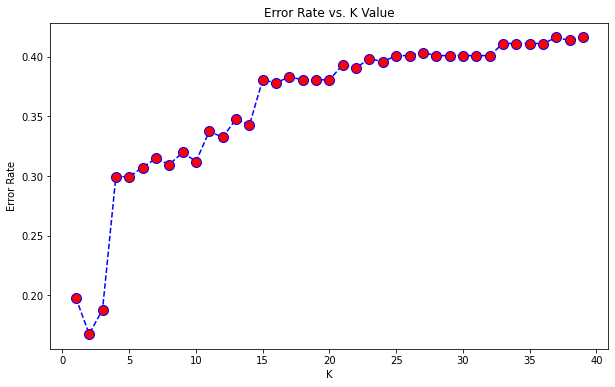

In [54]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

From the above graph and result, we can see that the minimum error is found when n_neighbors = 1. So we use this as one model. We also want to test what happens when we build a model with a slightly higher error on training data, in order to measure the impact on the testing data, so we also build a model for n_neighbors = 3.

We initialize the KNeighborsClassifier with the selected values of n_neighbors = 1 and 3.

We then fit the training data.

In [55]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn1 = KNeighborsClassifier(n_neighbors=1)

knn3.fit(X_train, y_train)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)


To print the scores for the classifier on training and testing data:

In [56]:
print("The kNN score for training data is:")
print(knn3.score(X_train, y_train))
print(knn1.score(X_train, y_train))

predict5 = knn3.predict(X_train)
predict1 = knn1.predict(X_train)
print("")
print("The kNN score for testing data is:")
print(knn3.score(X_test, y_test))
print(knn1.score(X_test, y_test))

The kNN score for training data is:
0.9978213507625272
1.0

The kNN score for testing data is:
0.8121827411167513
0.8020304568527918


Here we can see that our hypothesis is validated, while n_neighbors = 1 gave us a better score for the training data, it was n_neighbors = 3 that gave us a better score for testing data.

# CONCLUSION: #

Extensive exploratory analysis uncovered some interesting trends and patterns. We found a significant correlation between currency movements for certain coins. There are also certain identifiable cryptocurrency groups that show similar activity at similar times during their lifetimes. 

The first quarter of the year (mainly January and February) was the most volatile for all currencies. We also looked at the lifetime activity of all cryptocurrencies and found that some follow very similar patterns. Some have peaked, crashed, and are on their way to recovery, while others have shown no signs of recovery after a significant drop.

We also found that machine learning techniques can be applied to predict prices of cryptocurrencies with a certain level of confidence. After researching different models and based on our learnings in this course, we used logistic regression, random forest regression and kNN model to predict prices and found that all of them perform well and conform to the data efficiently. We researched and applied the ARIMA model too and found that it works quite well as a predictor model. All the models provided satisfactory results.

# DISCLAIMER: #

In general, cryptocurrency markets are highly volatile and unpredictable. Long-term projections are therefore highly unrealistic. What we have attempted is a short-term prediction of price direction. Our exploratory analysis also uncovered some interesting trends and facts about the crypto market, but we cannot assume that they will apply to all cryptocurrencies in the long run. We recommend exercising caution when investing.



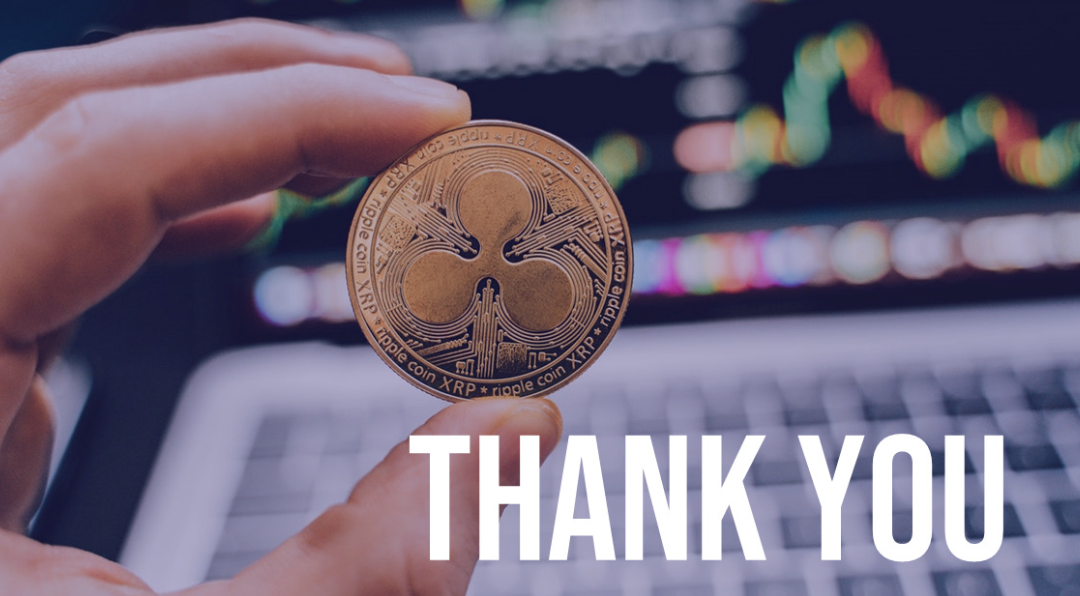

# REFERENCES: #

We used the following resources for reserach and project execution:

“A Historical Look at Ripple (XRP) Price: 2012-2021 | Trading Education.” Trading-Education.com, trading-education.com/a-historical-look-at-ripple-xrp-price. Accessed 17 Dec. 2022.

“A Deep Dive into Crypto Valuation.” Www.spglobal.com, www.spglobal.com/en/research-insights/featured/special-editorial/understanding-crypto-valuation#:~:text=As%20of%20August%202022%2C%20the. Accessed 17 Dec. 2022.

“CoinDesk: Bitcoin, Ethereum, Crypto News and Price Data.” Www.coindesk.com, www.coindesk.com/price/tether/.
